In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

iris = sns.load_dataset("iris")

<IPython.core.display.Javascript object>

The below cell is just making up some patterns to fit into this explanation.  Do not take any code from this cell as good practice.  Imagine we were just given the variables `X_train`, `X_test`, `y_train`, and `y_test` and we were told to build a model.

In [3]:
X_train = iris[["petal_length"]]
y_train = iris["petal_width"]

# Reverse the correlation by sorting in opposite directions
# Will be a non-representative test set to demo -R^2
# This is just for this demo, you should not do this in practice ever
X_test = iris[["petal_length"]].sort_values("petal_length").reset_index(drop=True)
y_test = iris["petal_width"].sort_values(ascending=False).reset_index(drop=True)

<IPython.core.display.Javascript object>

Below, the data is plotted to explore the relationship between x and y.  Usually we'd probably just look at the training data here, but we'll look at train and test to build up the example further.

The pattern in the training data seems apparent.  As X increase so does y, hopefully this is what our model will learn.

However, the testing data shows the exact opposite pattern.  A model that performs well on the training data will not do well on the testing data.

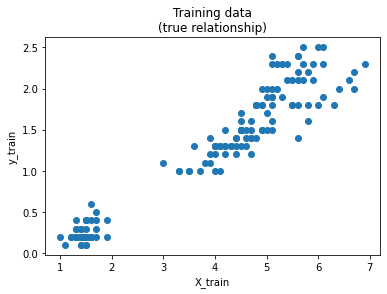

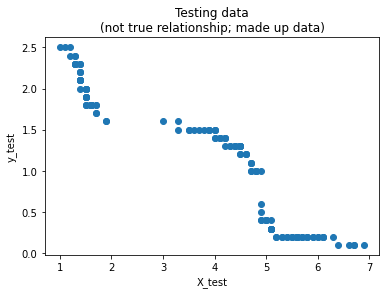

<IPython.core.display.Javascript object>

In [4]:
plt.scatter(X_train, y_train)
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.title("Training data\n(true relationship)")
plt.show()

plt.scatter(X_test, y_test)
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.title("Testing data\n(not true relationship; made up data)")
plt.show()

We build our model and score it.

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<IPython.core.display.Javascript object>

In [6]:
model.score(X_train, y_train)

0.9271098389904927

<IPython.core.display.Javascript object>

In [7]:
model.score(X_test, y_test)

-2.730791446432442

<IPython.core.display.Javascript object>

Oh No! We have negative $R^2$ on the testing data!  What does this mean?  I thought we interpreted $R^2$ as a percentage? Percentages can only range 0-1.

To understand why this can be negative and why we interpret as a percentage.  Let's look some the math and talk about it.

$$R^2 = 1 - \frac{SS_{res}}{SS_{total}}$$

* The $SS_{res}$ is the "sum of squared residuals".  To calulate it, we need our model's predictions and the true labels.  We compare the predictions to the labels to calculate the residuals (i.e. our mistakes: `y_true - y_pred`).  We then square these residuals to get rid of negatives and add them all up.


* The $SS_{total}$ is a baseline to compare $SS_{res}$ to.  Instead of using our model's predictions, what if we just predicted the mean?  To calculate the number we use the same steps as for $SS_{res}$.  Instead of the model predictions we use the mean of y.  So we end up with a sum of squared distances from the mean.


* If $SS_{res}$ equals $SS_{total}$ then the fraction in the formula becomes $1$ and the final output for $R^2$ is $0$; our model is adding nothing over just guessing the average.


* If $SS_{res}$ equals 0 (we made perfect predictions) then the fraction in the formula becomes $0$ and the final output for $R^2$ is $1$.


* You can think about $R^2$ as asking the question: "How is my model performing compared to just guessing the average of y?".

In [8]:
# Values that will be used in our R^2 calculation
y_true = y_test
y_pred = model.predict(X_test)
y_true_mean = y_true.mean()

<IPython.core.display.Javascript object>

In [9]:
# R^2 code
# Simplified from sklearn source code:
# https://github.com/scikit-learn/scikit-learn/blob/95d4f0841/sklearn/metrics/_regression.py#L488

# SS Residual: sum of squared residuals of the model
ss_res = np.sum((y_true - y_pred) ** 2)

# SS Total: sum of squared residuals if we ignored x and just predicted the mean of y
ss_total = np.sum((y_true - y_true_mean) ** 2)

1 - ss_res / ss_total

-2.730791446432442

<IPython.core.display.Javascript object>

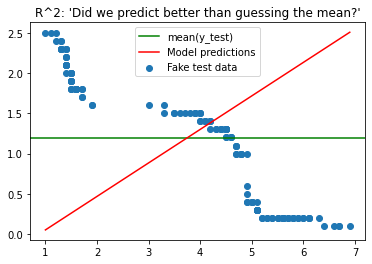

<IPython.core.display.Javascript object>

In [10]:
plt.scatter(X_test, y_test, label="Fake test data")
plt.axhline(y_true_mean, c="green", label="mean(y_test)")
plt.plot(X_test, y_pred, c="red", label="Model predictions")
plt.title("R^2: 'Did we predict better than guessing the mean?'")
plt.legend()
plt.show()